<a href="https://colab.research.google.com/github/chhayayadav/Dimensionality_Reduction/blob/master/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Loading the Poverty stat dataset(consisting 97 countries, on birth and death rates, infant mortality rates, life expectancies, and per capita GDP)
import pandas as pd
!wget https://www2.stetson.edu/~jrasp/data/Poverty.xls -p /content/sample_data/

--2020-06-29 07:16:31--  https://www2.stetson.edu/~jrasp/data/Poverty.xls
Resolving www2.stetson.edu (www2.stetson.edu)... 147.253.199.33
Connecting to www2.stetson.edu (www2.stetson.edu)|147.253.199.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23040 (22K) [application/vnd.ms-excel]
Saving to: ‘www2.stetson.edu/~jrasp/data/Poverty.xls’

www2.stetson.edu/~j 100%[===================>]  22.50K  --.-KB/s    in 0.03s   

2020-06-29 07:16:31 (850 KB/s) - ‘www2.stetson.edu/~jrasp/data/Poverty.xls’ saved [23040/23040]

/content/sample_data/: Scheme missing.
FINISHED --2020-06-29 07:16:31--
Total wall clock time: 0.2s
Downloaded: 1 files, 22K in 0.03s (850 KB/s)


In [4]:
df = pd.read_excel (r'/content/www2.stetson.edu/~jrasp/data/Poverty.xls')

In [5]:
#Printing the data matrix of the Poverty stat dataset
print(df)

    BirthRt  DeathRt  InfMort  LExpM  LExpF   GNP  Region            Country
0      24.7      5.7     30.8   69.6   75.5   600       1            Albania
1      12.5     11.9     14.4   68.3   74.7  2250       1           Bulgaria
2      13.4     11.7     11.3   71.8   77.7  2980       1     Czechoslovakia
3      12.0     12.4      7.6   69.8   75.9     *       1  Former_E._Germany
4      11.6     13.4     14.8   65.4   73.8  2780       1            Hungary
..      ...      ...      ...    ...    ...   ...     ...                ...
92     52.2     15.6    103.0   49.9   52.7   220       6             Uganda
93     50.5     14.0    106.0   51.3   54.7   110       6           Tanzania
94     45.6     14.2     83.0   50.3   53.7   220       6              Zaire
95     51.1     13.7     80.0   50.4   52.5   420       6             Zambia
96     41.7     10.3     66.0   56.5   60.1   640       6           Zimbabwe

[97 rows x 8 columns]


In [6]:
#correlation matrix of data matrix df
df.corr()

,BirthRt,DeathRt,InfMort,LExpM,LExpF,Region
BirthRt,1.000000,0.486197,0.858353,-0.866519,-0.894414,0.716883
DeathRt,0.486197,1.000000,0.654623,-0.733467,-0.693033,0.339988
InfMort,0.858353,0.654623,1.000000,-0.936838,-0.955352,0.632524
LExpM,-0.866519,-0.733467,-0.936838,1.000000,0.982558,-0.639382
LExpF,-0.894414,-0.693033,-0.955352,0.982558,1.000000,-0.693409
Region,0.716883,0.339988,0.632524,-0.639382,-0.693409,1.000000


In [7]:
#covariance matrix of data matrix df
df.cov()

,BirthRt,DeathRt,InfMort,LExpM,LExpF,Region
BirthRt,183.512951,30.610056,534.794969,-112.876752,-133.345211,16.900515
DeathRt,30.610056,21.599205,139.925900,-32.778745,-35.446906,2.749796
InfMort,534.794969,139.925900,2115.317811,-414.329256,-483.566866,50.627137
LExpM,-112.876752,-32.778745,-414.329256,92.466873,103.981642,-10.699710
LExpF,-133.345211,-35.446906,-483.566866,103.981642,121.118625,-13.280462
Region,16.900515,2.749796,50.627137,-10.699710,-13.280462,3.028565


In [8]:
# X is feature vectors
X = df[['BirthRt', 'DeathRt', 'InfMort', 'LExpM', 'LExpF']]
# Y is labels
Y = df[['Region']]

In [22]:
# SVD
# X = U s VT
from numpy import array
from scipy.linalg import svd
print(X)
U, s, VT = svd(X)

    BirthRt  DeathRt  InfMort  LExpM  LExpF
0      24.7      5.7     30.8   69.6   75.5
1      12.5     11.9     14.4   68.3   74.7
2      13.4     11.7     11.3   71.8   77.7
3      12.0     12.4      7.6   69.8   75.9
4      11.6     13.4     14.8   65.4   73.8
..      ...      ...      ...    ...    ...
92     52.2     15.6    103.0   49.9   52.7
93     50.5     14.0    106.0   51.3   54.7
94     45.6     14.2     83.0   50.3   53.7
95     51.1     13.7     80.0   50.4   52.5
96     41.7     10.3     66.0   56.5   60.1

[97 rows x 5 columns]


In [23]:
#Left Singular Vectors
print(U)

[[-0.09522272 -0.07541157 -0.02206634 ... -0.13365259 -0.15020387
  -0.13303602]
 [-0.08342388 -0.10495738  0.08991499 ... -0.00915663  0.02254102
   0.05994145]
 [-0.08532833 -0.1159986   0.07250613 ... -0.04403443 -0.09913293
  -0.06137307]
 ...
 [-0.10682172  0.05926143 -0.13897158 ...  0.95865624 -0.05449552
  -0.03203452]
 [-0.10607221  0.05704729 -0.23054646 ... -0.05439499  0.92089785
  -0.0448223 ]
 [-0.10326594  0.01705788 -0.14464436 ... -0.02980289 -0.04181868
   0.97014737]]


In [24]:
#Singular values
print(s)

[1097.63218544  458.56671516   67.83618      35.38920927   11.92406731]


In [25]:
#Right Singular Vectors
print(VT)

[[-0.27568852 -0.09991581 -0.55235482 -0.53190879 -0.57095522]
 [ 0.15114465  0.02827256  0.77865906 -0.40558745 -0.45337055]
 [-0.94501502  0.12206304  0.27564797  0.06190807  0.11060207]
 [-0.08807859 -0.97733742  0.11106951  0.15295019 -0.03638047]
 [-0.01843674  0.1383101  -0.01661267  0.72480721 -0.67446937]]


In [9]:
#rescaling feature vectors to all have the same scale
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [10]:
x_std

array([[-3.36128401e-01, -1.11087029e+00, -5.26742132e-01,
         8.48233350e-01,  8.53893523e-01],
       [-1.24139547e+00,  2.30112032e-01, -8.85173728e-01,
         7.12339276e-01,  7.80824252e-01],
       [-1.17461347e+00,  1.86854537e-01, -9.52926042e-01,
         1.07820794e+00,  1.05483402e+00],
       [-1.27849658e+00,  3.38255768e-01, -1.03379171e+00,
         8.69140130e-01,  8.90428158e-01],
       [-1.30817747e+00,  5.54543240e-01, -8.76431494e-01,
         4.09190958e-01,  6.98621323e-01],
       [-1.10783148e+00, -1.37576670e-01, -8.50204792e-01,
         5.97351983e-01,  8.72160840e-01],
       [-1.15977303e+00, -2.94329343e-02, -6.11978914e-01,
         5.24178251e-01,  5.70750099e-01],
       [-1.13009214e+00, -3.97121636e-01, -7.58411334e-01,
         7.43699447e-01,  7.62556934e-01],
       [-8.55543932e-01, -1.80834165e-01, -6.97215696e-01,
         3.25563836e-01,  7.16888640e-01],
       [-1.04104948e+00, -2.88977900e-01, -9.13585989e-01,
         5.13724861e-01

In [11]:
# Covariance Matrix of features
import numpy as np
# features are columns from x_std
features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.01041667  0.4912611   0.8672946  -0.87554517 -0.90373083]
 [ 0.4912611   1.01041667  0.66144222 -0.74110688 -0.7002522 ]
 [ 0.8672946   0.66144222  1.01041667 -0.94659717 -0.96530323]
 [-0.87554517 -0.74110688 -0.94659717  1.01041667  0.9927928 ]
 [-0.90373083 -0.7002522  -0.96530323  0.9927928   1.01041667]]


In [12]:
#eigen values and eigen vectors from the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [13]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.43608992 -0.4732857   0.72929146 -0.22269744  0.06607609]
 [-0.36801471  0.86516808  0.29031745 -0.17587254 -0.02887919]
 [-0.46638433 -0.1318789  -0.57414551 -0.64413138  0.14333637]
 [ 0.47725374  0.00517659  0.15452835 -0.61885714 -0.60443271]
 [ 0.47864943  0.10032949  0.17414841 -0.34869086  0.78033052]]


In [14]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[4.30265372 0.55521092 0.12186729 0.05886074 0.01349066]


In [15]:
#We reduce dimension to 1 dimension, since 1 eigenvector has ~85% (enough) variances
eig_vals[0] / sum(eig_vals)

0.8516592924195583

In [16]:
# Project data point onto selected(here the first one) Eigen Vector
projected_X = x_std.dot(eig_vecs.T[0])

In [17]:
projected_X

array([ 1.61460128,  1.58321426,  1.90737613,  1.75620394,  1.30483947,
        1.63281433,  1.3253697 ,  1.71261034,  1.26332909,  1.65780153,
        1.50182309,  1.25415296, -2.69726185,  0.27550561,  1.6960325 ,
        0.81687937,  0.2310392 ,  0.24395638,  0.53652572, -0.6960133 ,
        1.52559797,  1.44120303, -0.83133649,  1.94574478,  2.0861052 ,
        1.96254936,  2.27108607,  2.08224813,  1.73516243,  2.01442245,
        2.30886294,  2.37442338,  1.67659928,  1.6165609 ,  2.38022114,
        2.19792622,  2.35974263,  1.97508307,  2.39264046,  2.87172036,
        2.41547506,  2.12083004, -4.35670389,  1.39059493, -1.79566945,
       -0.3182056 ,  2.15716691,  0.35880708,  2.05562316,  0.2780926 ,
       -0.1158753 , -0.35386166,  0.01506656,  1.71268768, -2.11685817,
       -3.051236  ,  1.35510206,  2.78629637, -1.42100241, -0.40060798,
        0.4335152 ,  1.19332977, -0.42749647, -2.71345424, -0.78292277,
        0.27045072,  2.00469746,  1.54509448,  0.98371174,  0.11

In [18]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

In [19]:
result.head()

,PC1,y-axis,label
0,1.614601,0.0,1
1,1.583214,0.0,1
2,1.907376,0.0,1
3,1.756204,0.0,1
4,1.304839,0.0,1


In [20]:
# Plotting the feature obtained against label(regions 1 to 6 as in dataset)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'PCA result')

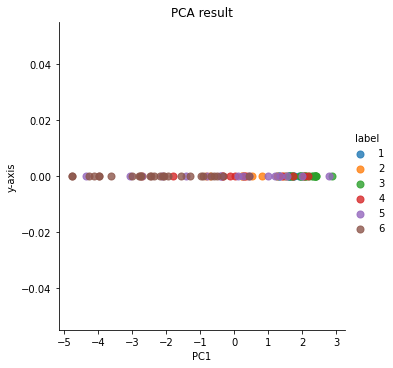

In [21]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')